# MCMC
##### Sean Wade

In [157]:
from __future__ import division

import numpy as np
from scipy.stats import poisson, norm
import random
from scipy import interpolate


from math import factorial, e

from matplotlib import pyplot as plt
import seaborn as sns
% matplotlib inline

from IPython.core.display import HTML
import urllib2
HTML(urllib2.urlopen('http://seanwade.com/jupyter.css').read())

## Problem 2

Code up MH to sample Poisson {1,2,...}

In [158]:
def poisson_mh(T, lmbda=5, burn_in=1000):
    """ Draw from poisson with Metropolis Hastings. """

    samples = np.empty(T, dtype=int)
    proposed_step = 1 - 2*np.random.randint(0,2, T)
    decision = np.random.uniform(0, 1, T)
    
    # randomly pick the starting state
    samples[0] = random.randint(1, 10)
    
    for t in range(T-1):
        proposal = max(samples[t] + proposed_step[t], 1)
        f = lambda k: lmbda**k * np.exp(-lmbda) / factorial(k)
        if decision[t] >= f(proposal) / f(samples[t]):
            samples[t+1] = samples[t]
        else:
            samples[t+1] = proposal
            
    return samples[burn_in:]

In [178]:
# Metropolis Hastings
draws = poisson_mh(10**6, lmbda=5, burn_in=10**3)
plt.hist(draws, normed=True)

# actual
x = range(0,14)
prob = poisson.pmf(x, 5)
l = np.linspace(0,14,100)
s = interpolate.spline(x, prob, l)
plt.plot(l,s)
plt.show()

## Problem 3

In [160]:
def normal_mh(T,  burn_in=1000):
    """ Draw from truncated normal with Metropolis Hastings. """
    
    def normal(x):
        """ Normal distribution with  mu=.33, sigma=.25"""
        mu, sigma = 1/3, 1/4
        return 1./np.sqrt(2*np.pi*sigma) * np.exp(-((x-mu)**2)/(2*sigma**2))

    state_seq = np.random.uniform(0, 1, T)
    coin_flip = np.random.uniform(0, 1, T)
    
    for t in range(T-1):
        if coin_flip[t] >= normal(state_seq[t+1]) / normal(state_seq[t]):
            state_seq[t+1] = state_seq[t]
            
    return state_seq[burn_in:]

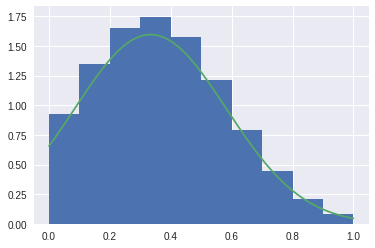

In [177]:
# Our draws
draws = normal_mh(1000000,  burn_in=10**3)
plt.hist(draws, normed=True)

# Actual
x_lin = np.linspace(0,1,100)
y = norm.pdf(x_lin, loc=1/3, scale=1/4)
plt.plot(x_lin, y)

plt.show()